# 

https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import (
    datasets,
    decomposition,
    linear_model,
    metrics,
    model_selection,
    naive_bayes,
    pipeline,
)

%config InlineBackend.figure_format="retina"  # For high DPI display

print(sklearn.__version__)  # 1.0.2

1.0.2


---

---

### Classification (digits)

#### Chargement des données

https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset

In [12]:
digits = datasets.load_digits()

In [13]:
# Flatten the images
n_samples = len(digits.images)
print(digits.images.shape)

xs = digits.images.reshape([n_samples, -1])
ys = digits.target

print(xs.shape, ys.shape)

(1797, 8, 8)
(1797, 64) (1797,)


In [14]:
xs_train, xs_test, ys_train, ys_test = model_selection.train_test_split(
    xs, ys, random_state=1
)

print(ys_train.shape, xs_train.shape)
print(ys_test.shape, xs_test.shape)

(1347,) (1347, 64)
(450,) (450, 64)


#### Entrainement des modèles

In [15]:
# 2. Instantiaiton
model = naive_bayes.GaussianNB()

# 3. Apprentissage (fit) du model
model.fit(xs_train, ys_train)

# 4. Prédire sur les données de test
ys_pred = model.predict(xs_test)

#### Évaluation

In [16]:
score = metrics.accuracy_score(ys_test, ys_pred)

print(f"{score :.4f}")

0.8533


In [17]:
print(metrics.classification_report(ys_test, ys_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.81      0.81      0.81        42
           2       0.93      0.66      0.77        41
           3       0.93      0.77      0.84        52
           4       0.93      0.91      0.92        47
           5       0.94      0.85      0.89        39
           6       0.96      1.00      0.98        43
           7       0.80      1.00      0.89        48
           8       0.51      0.95      0.67        37
           9       1.00      0.62      0.77        48

    accuracy                           0.85       450
   macro avg       0.88      0.85      0.85       450
weighted avg       0.89      0.85      0.86       450



In [18]:
scores_dic = metrics.classification_report(ys_test, ys_pred, output_dict=True)
scores_df = pd.DataFrame(scores_dic).transpose()

scores_df.style.format("{:.2g}")

,precision,recall,f1-score,support
0,0.98,0.96,0.97,53
1,0.81,0.81,0.81,42
2,0.93,0.66,0.77,41
3,0.93,0.77,0.84,52
4,0.93,0.91,0.92,47
5,0.94,0.85,0.89,39
6,0.96,1,0.98,43
7,0.8,1,0.89,48
8,0.51,0.95,0.67,37
9,1,0.62,0.77,48


In [19]:
scores_df[["precision"]].style.format("{:.2g}")

,precision
0,0.98
1,0.81
2,0.93
3,0.93
4,0.93
5,0.94
6,0.96
7,0.8
8,0.51
9,1


#### Matrice de confusion

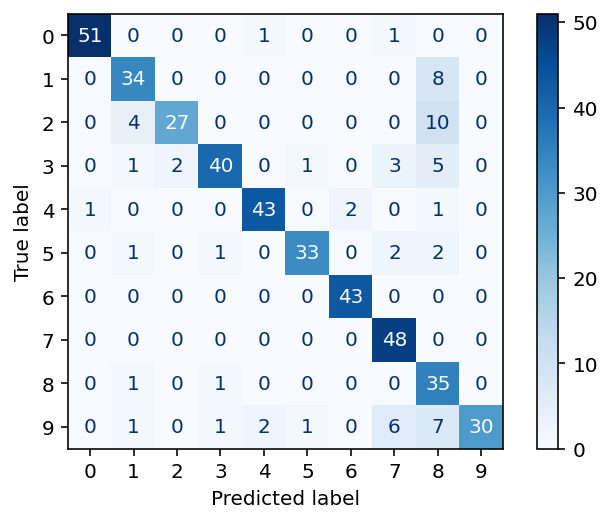

In [20]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(
    ys_test, ys_pred, cmap=plt.cm.Blues
)

In [21]:
disp.confusion_matrix

array([[51,  0,  0,  0,  1,  0,  0,  1,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  8,  0],
       [ 0,  4, 27,  0,  0,  0,  0,  0, 10,  0],
       [ 0,  1,  2, 40,  0,  1,  0,  3,  5,  0],
       [ 1,  0,  0,  0, 43,  0,  2,  0,  1,  0],
       [ 0,  1,  0,  1,  0, 33,  0,  2,  2,  0],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 35,  0],
       [ 0,  1,  0,  1,  2,  1,  0,  6,  7, 30]], dtype=int64)

#### Visualisation des erreurs

In [22]:
np.where(ys_test == 2)

(array([ 11,  34,  46,  60,  76,  80,  87,  89,  90,  91,  92,  99, 102,
        106, 109, 111, 117, 154, 155, 156, 175, 182, 194, 218, 233, 240,
        241, 272, 284, 288, 293, 298, 313, 314, 338, 358, 364, 373, 392,
        396, 433], dtype=int64),)

In [23]:
(indexes,) = np.where((ys_test == 2) & (ys_pred == 8))
indexes

array([ 11,  60,  99, 106, 109, 233, 284, 298, 313, 396], dtype=int64)

In [24]:
def plot_digit(idx, xs_test, ys_test, ys_pred):
    print(f"Digit value: {ys_test[idx]}, prediction: {ys_pred[idx]}")

    plt.figure(figsize=(3, 3))
    plt.imshow(
        xs_test[idx].reshape([8, 8]),
        cmap=plt.cm.gray_r,
        interpolation="nearest",
    )

Digit value: 2, prediction: 8


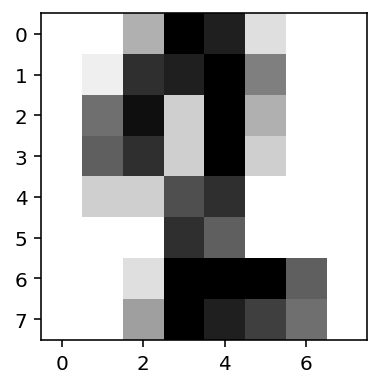

In [25]:
plot_digit(99, xs_test, ys_test, ys_pred)

---

### PCA

#### Initialisation des PCA et sélection des données

In [26]:
N_COMP = 10

pca = decomposition.PCA(n_components=N_COMP)
xps_train = pca.fit_transform(xs_train)
xps_test = pca.transform(xs_test)

print(xs_train.shape, xs_test.shape)
print(xps_train.shape, xps_test.shape)

(1347, 64) (450, 64)
(1347, 10) (450, 10)


#### Entrainement des modèles

In [27]:
# 2. Instantiaiton
model_pca = naive_bayes.GaussianNB()
# model_pca = linear_model.LogisticRegression(max_iter=2000)

# 3. Apprentissage (fit) du model
model_pca.fit(xps_train, ys_train)

# 4. Prédire sur les données de test
yps_pred = model_pca.predict(xps_test)

#### Évaluation

In [28]:
score = metrics.accuracy_score(ys_test, yps_pred)
print(f"{score :.04f}")

0.9111


In [29]:
print(metrics.classification_report(ys_test, yps_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        53
           1       0.73      0.88      0.80        42
           2       0.95      0.85      0.90        41
           3       0.96      0.83      0.89        52
           4       0.98      1.00      0.99        47
           5       0.88      0.95      0.91        39
           6       1.00      1.00      1.00        43
           7       0.90      0.96      0.93        48
           8       0.86      0.81      0.83        37
           9       0.88      0.88      0.88        48

    accuracy                           0.91       450
   macro avg       0.91      0.91      0.91       450
weighted avg       0.92      0.91      0.91       450



---

### Cross-Validation

![](img/grid_search_cross_validation.png)

In [30]:
SCORINGS = "f1_weighted"

In [31]:
N_COMP = 10

pca = decomposition.PCA(n_components=N_COMP)
model = naive_bayes.GaussianNB()

pipe = pipeline.Pipeline(steps=[("pca", pca), ("model", model)])

scores = model_selection.cross_val_score(pipe, xs, ys, cv=10, scoring=SCORINGS)

with np.printoptions(precision=2):
    print(scores)

print(f"\n{SCORINGS}: {scores.mean():.2f}, with std dev: {scores.std():.2f}\n")

[0.88 0.92 0.89 0.87 0.89 0.9  0.93 0.96 0.84 0.87]

f1_weighted: 0.89, with std dev: 0.03



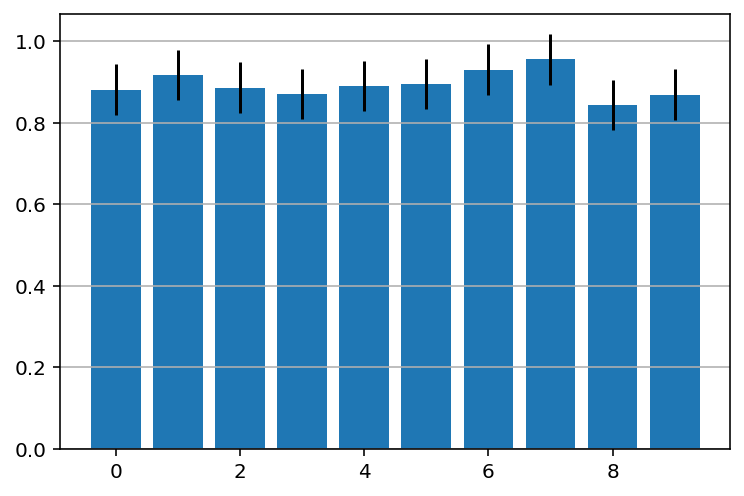

In [32]:
plt.bar(range(len(scores)), scores, yerr=2 * scores.std())
plt.grid(axis="y")
plt.show()

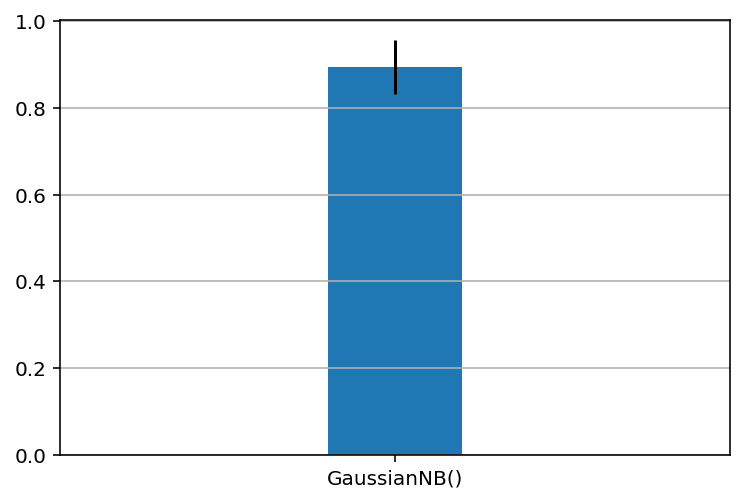

In [33]:
plt.bar([str(model)], scores.mean(), yerr=2 * scores.std())
plt.xlim(-2, 2)
plt.grid(axis="y")
plt.show()

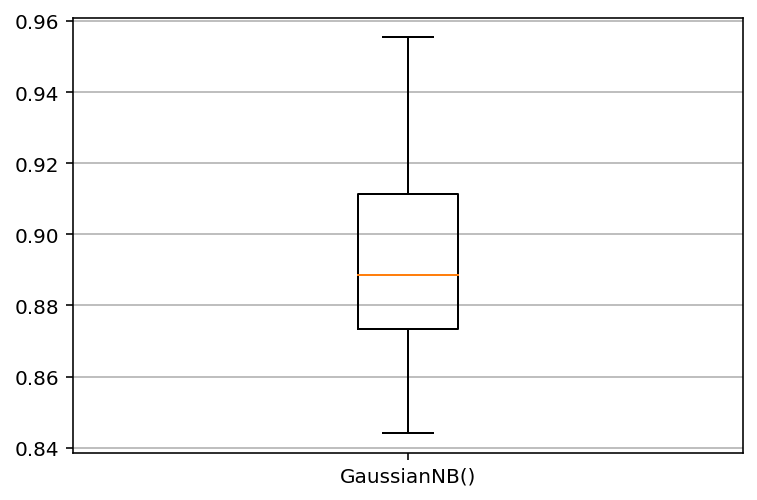

(10,)

In [42]:
plt.boxplot(scores)
plt.xticks([1], [str(model)])
plt.grid(axis="y")
plt.show()
scores.shape

---

### Grid Search

In [35]:
param_grid = {"pca__n_components": [1, 2, 5, 10, 20, 30, 40, 60]}

In [36]:
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.

pca = decomposition.PCA()
model = naive_bayes.GaussianNB()

pipe = pipeline.Pipeline(steps=[("pca", pca), ("model", model)])

In [37]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:

search = model_selection.GridSearchCV(
    pipe, param_grid, n_jobs=-1, scoring=SCORINGS, verbose=4, cv=10
)

search.fit(xs, ys)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('model', GaussianNB())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [1, 2, 5, 10, 20, 30, 40, 60]},
             scoring='f1_weighted', verbose=4)

In [38]:
print(f"Best parameter (CV score: {search.best_score_:.3f})")

print(search.best_params_)

Best parameter (CV score: 0.915)
{'pca__n_components': 30}


In [39]:
cv_results_df = pd.DataFrame(search.cv_results_).drop(columns="params")

cv_results_df.style.format("{:.2g}")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027,0.0034,0.0049,0.0018,1,0.3,0.37,0.25,0.28,0.32,0.28,0.36,0.3,0.3,0.28,0.3,0.036,8
1,0.026,0.0029,0.0049,0.00083,2,0.54,0.68,0.59,0.64,0.66,0.59,0.62,0.57,0.58,0.58,0.6,0.042,7
2,0.032,0.004,0.0046,0.001,5,0.83,0.88,0.79,0.82,0.84,0.77,0.83,0.83,0.75,0.84,0.82,0.035,6
3,0.025,0.0012,0.0055,0.0013,10,0.88,0.92,0.89,0.87,0.89,0.9,0.93,0.96,0.84,0.87,0.89,0.031,4
4,0.034,0.0042,0.0054,0.0016,20,0.88,0.95,0.89,0.9,0.89,0.91,0.96,0.97,0.85,0.91,0.91,0.035,3
5,0.057,0.0099,0.0058,0.0015,30,0.89,0.94,0.9,0.92,0.89,0.91,0.97,0.97,0.85,0.9,0.92,0.036,1
6,0.067,0.0077,0.0088,0.0079,40,0.88,0.92,0.91,0.93,0.89,0.91,0.97,0.94,0.87,0.9,0.91,0.028,2
7,0.033,0.009,0.0063,0.0018,60,0.87,0.9,0.88,0.75,0.82,0.85,0.92,0.94,0.8,0.85,0.86,0.056,5


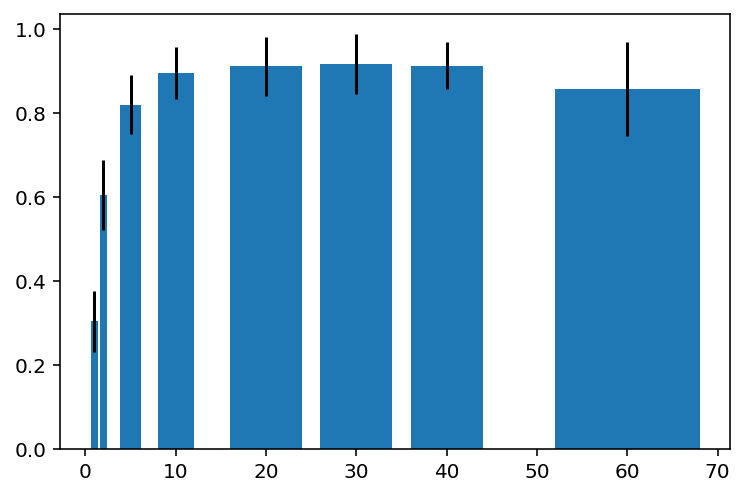

In [40]:
plt.bar(
    cv_results_df["param_pca__n_components"],
    cv_results_df["mean_test_score"],
    yerr=2 * cv_results_df["std_test_score"],
    width=0.8 * np.diff(cv_results_df["param_pca__n_components"], prepend=0),
)
plt.show()

---